In [2]:
#@title Installere bibliotekker
!pip install yfinance
!pip install pandas-datareader

     |████████████████████████████████| 6.3 MB 18.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=a9f4b4963aa7e4c4a912cf2dfd2b88acb85b820d361071f001de5ad429767882
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
#@title Hent aktier
import yfinance as yf

def stockDownload(symbol):

  stock = yf.Ticker(symbol)

  hist = stock.history(period="5y")

  return hist


In [4]:
data=stockDownload("SIEGY")
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-10-24,49.980072,49.980072,49.612791,49.719559,109000,0.0,0.0
2016-10-25,49.685395,49.753728,49.424885,49.570087,111800,0.0,0.0
2016-10-26,49.565816,49.646960,49.343741,49.476131,130800,0.0,0.0
2016-10-27,48.549388,48.621989,48.258980,48.446892,71600,0.0,0.0
2016-10-28,48.066798,48.463974,48.066798,48.276062,80200,0.0,0.0
...,...,...,...,...,...,...,...
2021-10-15,81.550003,82.080002,81.309998,81.919998,89900,0.0,0.0
2021-10-18,81.150002,81.360001,80.660004,81.290001,292200,0.0,0.0
2021-10-19,81.410004,81.930000,81.330002,81.800003,60200,0.0,0.0


In [5]:
#data['Date']=data.index

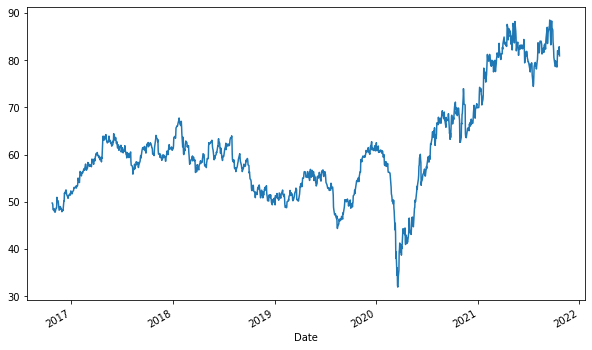

In [6]:
#Import Libraries
import numpy as np  
import pandas as pd  
import pandas_datareader as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

#Settings for Monte Carlo asset data, how long, and how many forecasts 
ticker = 'XTZ_USD' # ticker
t_intervals = 100 # time steps forecasted into future
iterations = 25 # amount of simulations
#Acquiring data

data=stockDownload("SIEGY")
data = data.dropna() #pd.read_csv('XTZ_USD Huobi Historical Data.csv',index_col=0,usecols=['Date', 'Price'])


data.rename(columns = {'Close':'Price'}, inplace = True)

#data = data.rename(columns={"Price": "Close"})

data=data['Price']
#Preparing log returns from data
log_returns = np.log(1 + data.pct_change())

#Plot of asset historical closing price
data.plot(figsize=(10, 6));

In [7]:
data

Date
2016-10-24    49.719559
2016-10-25    49.570087
2016-10-26    49.476131
2016-10-27    48.446892
2016-10-28    48.276062
                ...    
2021-10-15    81.919998
2021-10-18    81.290001
2021-10-19    81.800003
2021-10-20    82.820000
2021-10-21    80.900002
Name: Price, Length: 1258, dtype: float64

In [8]:
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
#Takes last data point as startpoint point for simulation
S0 = data.iloc[-1]
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
#Applies Monte Carlo simulation in asset
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]


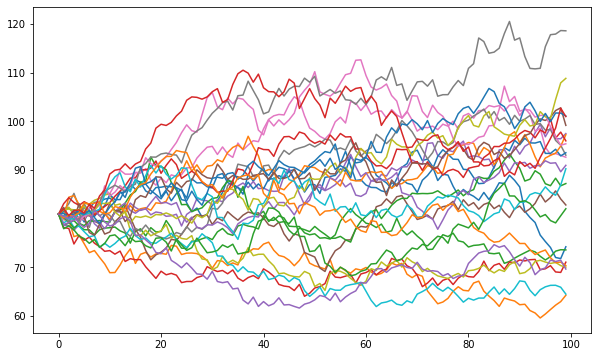

In [9]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

In [10]:
df = pd.DataFrame(price_list)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002
1,81.490739,79.758663,78.625275,78.128786,78.594292,81.514128,79.880652,81.607645,81.877720,79.074891,81.498035,80.143166,80.108521,83.049527,78.776075,82.287880,80.364727,80.458141,81.791625,80.515399,81.054895,80.123607,77.903183,81.952029,80.451012
2,82.145015,79.714381,79.058752,77.954609,78.527382,80.392365,79.142781,83.057781,82.322249,79.859003,80.510274,84.387104,79.351807,84.271312,79.162330,80.301784,79.885645,79.404381,81.940568,79.915643,80.169536,80.640136,78.499453,80.620369,80.043880
3,81.171320,76.276521,79.570551,74.768324,77.578712,81.399985,79.851321,85.161442,80.784664,78.201066,80.899128,84.694527,77.988064,83.299137,79.661808,79.864660,80.246495,80.604386,81.783870,79.918872,81.704785,80.545598,77.666626,81.618446,80.641724
4,81.014269,76.597625,78.495482,76.510857,78.779380,79.999164,80.363400,82.338831,79.277544,78.414264,81.497888,82.896360,79.014141,82.710379,79.833417,83.042338,79.534506,79.460382,81.818020,81.136993,81.222106,81.174657,76.368067,81.766592,78.945901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,75.270152,60.370176,71.478306,69.672896,96.804022,83.403004,94.652971,98.161938,71.052268,65.962424,93.382745,92.426513,87.151647,97.580541,91.860828,100.154935,101.304804,115.317810,100.896354,86.510223,101.594390,73.527598,80.810513,94.492662,69.858916
96,74.054984,61.294101,72.159438,70.310846,98.631954,84.299805,93.159443,98.296391,70.763181,66.266067,93.383508,92.980502,86.740937,100.527556,91.362822,100.837576,98.873604,117.779342,100.577077,85.402299,99.922891,71.931449,79.576644,96.444356,71.456780
97,71.992130,62.193114,73.291263,69.020067,96.409065,85.676366,93.351075,96.052423,70.977262,66.280926,94.231411,93.431393,88.281287,96.538207,91.451462,102.192056,96.819755,117.901858,104.443034,84.790634,101.687626,70.945343,79.100740,98.574376,71.164561
98,71.765684,62.922346,73.588537,68.924718,96.394158,84.018589,92.973997,95.070011,70.328308,65.879881,92.865611,94.870479,86.726325,97.754969,89.607276,102.745615,95.062688,118.629185,107.882149,86.871852,101.663529,71.046993,80.565356,102.673607,71.433682


In [11]:
for column in df.columns:
  df.rename(inplace=True, columns={column: "opt_"+str(column)})

df['index']=df.index
df


,opt_0,opt_1,opt_2,opt_3,opt_4,opt_5,opt_6,opt_7,opt_8,opt_9,opt_10,opt_11,opt_12,opt_13,opt_14,opt_15,opt_16,opt_17,opt_18,opt_19,opt_20,opt_21,opt_22,opt_23,opt_24,index
0,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,80.900002,0
1,81.490739,79.758663,78.625275,78.128786,78.594292,81.514128,79.880652,81.607645,81.877720,79.074891,81.498035,80.143166,80.108521,83.049527,78.776075,82.287880,80.364727,80.458141,81.791625,80.515399,81.054895,80.123607,77.903183,81.952029,80.451012,1
2,82.145015,79.714381,79.058752,77.954609,78.527382,80.392365,79.142781,83.057781,82.322249,79.859003,80.510274,84.387104,79.351807,84.271312,79.162330,80.301784,79.885645,79.404381,81.940568,79.915643,80.169536,80.640136,78.499453,80.620369,80.043880,2
3,81.171320,76.276521,79.570551,74.768324,77.578712,81.399985,79.851321,85.161442,80.784664,78.201066,80.899128,84.694527,77.988064,83.299137,79.661808,79.864660,80.246495,80.604386,81.783870,79.918872,81.704785,80.545598,77.666626,81.618446,80.641724,3
4,81.014269,76.597625,78.495482,76.510857,78.779380,79.999164,80.363400,82.338831,79.277544,78.414264,81.497888,82.896360,79.014141,82.710379,79.833417,83.042338,79.534506,79.460382,81.818020,81.136993,81.222106,81.174657,76.368067,81.766592,78.945901,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,75.270152,60.370176,71.478306,69.672896,96.804022,83.403004,94.652971,98.161938,71.052268,65.962424,93.382745,92.426513,87.151647,97.580541,91.860828,100.154935,101.304804,115.317810,100.896354,86.510223,101.594390,73.527598,80.810513,94.492662,69.858916,95
96,74.054984,61.294101,72.159438,70.310846,98.631954,84.299805,93.159443,98.296391,70.763181,66.266067,93.383508,92.980502,86.740937,100.527556,91.362822,100.837576,98.873604,117.779342,100.577077,85.402299,99.922891,71.931449,79.576644,96.444356,71.456780,96
97,71.992130,62.193114,73.291263,69.020067,96.409065,85.676366,93.351075,96.052423,70.977262,66.280926,94.231411,93.431393,88.281287,96.538207,91.451462,102.192056,96.819755,117.901858,104.443034,84.790634,101.687626,70.945343,79.100740,98.574376,71.164561,97
98,71.765684,62.922346,73.588537,68.924718,96.394158,84.018589,92.973997,95.070011,70.328308,65.879881,92.865611,94.870479,86.726325,97.754969,89.607276,102.745615,95.062688,118.629185,107.882149,86.871852,101.663529,71.046993,80.565356,102.673607,71.433682,98


In [13]:
import altair as alt


alt.Chart(df).mark_line().transform_fold(list(df.columns.drop('index'))).encode(
    x="index:Q",
    y="value:Q",
    color='key:N'

)

alt.Chart(...)

In [14]:
import altair as alt
from vega_datasets import data

source = data.cars.url



brush = alt.selection(type='interval', encodings=['x'])

base = alt.Chart(df).mark_line().transform_fold(list(df.columns.drop('index'))).encode(
    alt.X('index:Q'
    ),
    alt.Y('value:Q',
        scale=alt.Scale(zero=False)
    ),

    color='key:N'

)

points = base.mark_line().add_selection(brush)

density_x = base.transform_filter(
    brush
).transform_density(
    density='value',
    #groupby=['key'],
    steps=200,
    #extent=[0, 26],
    as_=['value', 'density']
).mark_area(orient='horizontal', opacity=0.5).encode(
    x='density:Q',
).properties(
    width=100
)


density_y = base.transform_filter(
    brush
).transform_density(
    density='value',
    groupby=['key'],
    steps=200,
    #extent=[0, 26],
    as_=['value', 'density']
).mark_area(orient='horizontal', opacity=0.5).encode(
    x='density:Q',
).properties(
    width=100
)

(points | density_y |density_x).resolve_scale(
    y='shared'
).save("Monte_carlo.html")